In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.6f'%x)
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv("F:/DATA/勒索软件/CIC-MalMem-2022/archive/Ransomware_dataset.csv")


In [3]:
data.shape

(39089, 57)

In [4]:
data['Class'].value_counts()

Class
Benign     29298
Malware     9791
Name: count, dtype: int64

In [5]:
data=data.drop_duplicates(subset=None,keep='first')

In [6]:
data.shape

(38757, 57)

In [7]:
data.reset_index(drop=True, inplace=True)

In [8]:
data['Class'] = data['Class'].map({'Benign': 0, 'Malware': 1})

In [9]:
data['Category'].value_counts()

Category
Benign              29231
Ransomware-Shade     2127
Ransomware-Ako       2000
Ransomware-Conti     1987
Ransomware-Maze      1754
Ransomware-Pysa      1658
Name: count, dtype: int64

In [10]:
labels=data['Category'].unique().tolist()

In [11]:
labels

['Benign',
 'Ransomware-Ako',
 'Ransomware-Conti',
 'Ransomware-Maze',
 'Ransomware-Pysa',
 'Ransomware-Shade']

In [12]:
data['Category']=data['Category'].apply(lambda x:labels.index(x))
print(data['Category'].value_counts())

Category
0    29231
5     2127
1     2000
2     1987
3     1754
4     1658
Name: count, dtype: int64


In [13]:
data.corr().to_csv('data_corr_all.csv')

In [25]:
data.describe().to_csv('data_describe_all.csv')

In [26]:
data.columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [69]:
data.to_csv('data_all_tempt.csv',index=0)

In [6]:
data_tempt=pd.read_csv('data_all_tempt.csv')

In [71]:
import pandas as pd


# 假设你有一个名为data的DataFrame对象，其中包含你的特征


# 计算特征之间的相关系数矩阵
corr_matrix = data.corr().round(2)




# 找到相关系数为1的特征组
feature_groups = []


for feature in corr_matrix.columns:
    correlated_features = corr_matrix.index[corr_matrix[feature] == 1].tolist()
    if correlated_features and feature not in feature_groups:
        correlated_features.append(feature)
        feature_groups.append(correlated_features)


# 输出特征组
if not feature_groups:
    print("没有相关系数为1的特征组。")
else:
    for group in feature_groups:
        print("特征组:", group)


特征组: ['Category', 'Category']
特征组: ['pslist.nproc', 'pslist.nproc']
特征组: ['pslist.nppid', 'pslist.nppid']
特征组: ['pslist.avg_threads', 'pslist.avg_threads']
特征组: ['pslist.avg_handlers', 'handles.avg_handles_per_proc', 'pslist.avg_handlers']
特征组: ['dlllist.ndlls', 'dlllist.ndlls']
特征组: ['dlllist.avg_dlls_per_proc', 'dlllist.avg_dlls_per_proc']
特征组: ['handles.nhandles', 'handles.nhandles']
特征组: ['pslist.avg_handlers', 'handles.avg_handles_per_proc', 'handles.avg_handles_per_proc']
特征组: ['handles.nfile', 'handles.nfile']
特征组: ['handles.nevent', 'handles.nevent']
特征组: ['handles.ndesktop', 'handles.ndesktop']
特征组: ['handles.nkey', 'handles.nkey']
特征组: ['handles.nthread', 'handles.nthread']
特征组: ['handles.ndirectory', 'handles.ndirectory']
特征组: ['handles.nsemaphore', 'handles.nsemaphore']
特征组: ['handles.ntimer', 'handles.ntimer']
特征组: ['handles.nsection', 'handles.nsection']
特征组: ['handles.nmutant', 'handles.nmutant']
特征组: ['ldrmodules.not_in_load', 'ldrmodules.not_in_mem', 'ldrmodules.not_in

In [ ]:
# 特征组: ['malfind.ninjections', 'malfind.protection',]

# 特征组: ['psxview.not_in_pslist', 'psxview.not_in_session']

# 特征组: ['psxview.not_in_ethread_pool', 'psxview.not_in_csrss_handles',]

# 特征组: ['psxview.not_in_pslist_false_avg', 'psxview.not_in_session_false_avg',]


In [7]:
data_tempt.columns.tolist()

['Category',
 'pslist.nproc',
 'pslist.nppid',
 'pslist.avg_threads',
 'pslist.nprocs64bit',
 'pslist.avg_handlers',
 'dlllist.ndlls',
 'dlllist.avg_dlls_per_proc',
 'handles.nhandles',
 'handles.avg_handles_per_proc',
 'handles.nport',
 'handles.nfile',
 'handles.nevent',
 'handles.ndesktop',
 'handles.nkey',
 'handles.nthread',
 'handles.ndirectory',
 'handles.nsemaphore',
 'handles.ntimer',
 'handles.nsection',
 'handles.nmutant',
 'ldrmodules.not_in_load',
 'ldrmodules.not_in_init',
 'ldrmodules.not_in_mem',
 'ldrmodules.not_in_load_avg',
 'ldrmodules.not_in_init_avg',
 'ldrmodules.not_in_mem_avg',
 'malfind.ninjections',
 'malfind.commitCharge',
 'malfind.protection',
 'malfind.uniqueInjections',
 'psxview.not_in_pslist',
 'psxview.not_in_eprocess_pool',
 'psxview.not_in_ethread_pool',
 'psxview.not_in_pspcid_list',
 'psxview.not_in_csrss_handles',
 'psxview.not_in_session',
 'psxview.not_in_deskthrd',
 'psxview.not_in_pslist_false_avg',
 'psxview.not_in_eprocess_pool_false_avg',


In [4]:
data_tempt.columns=['Category','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52','53', '54', '55', 'Class']

In [29]:
data_tempt=data_tempt.drop(['Category','Class'],axis=1)

In [30]:
data_tempt.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55'],
      dtype='object')

In [31]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

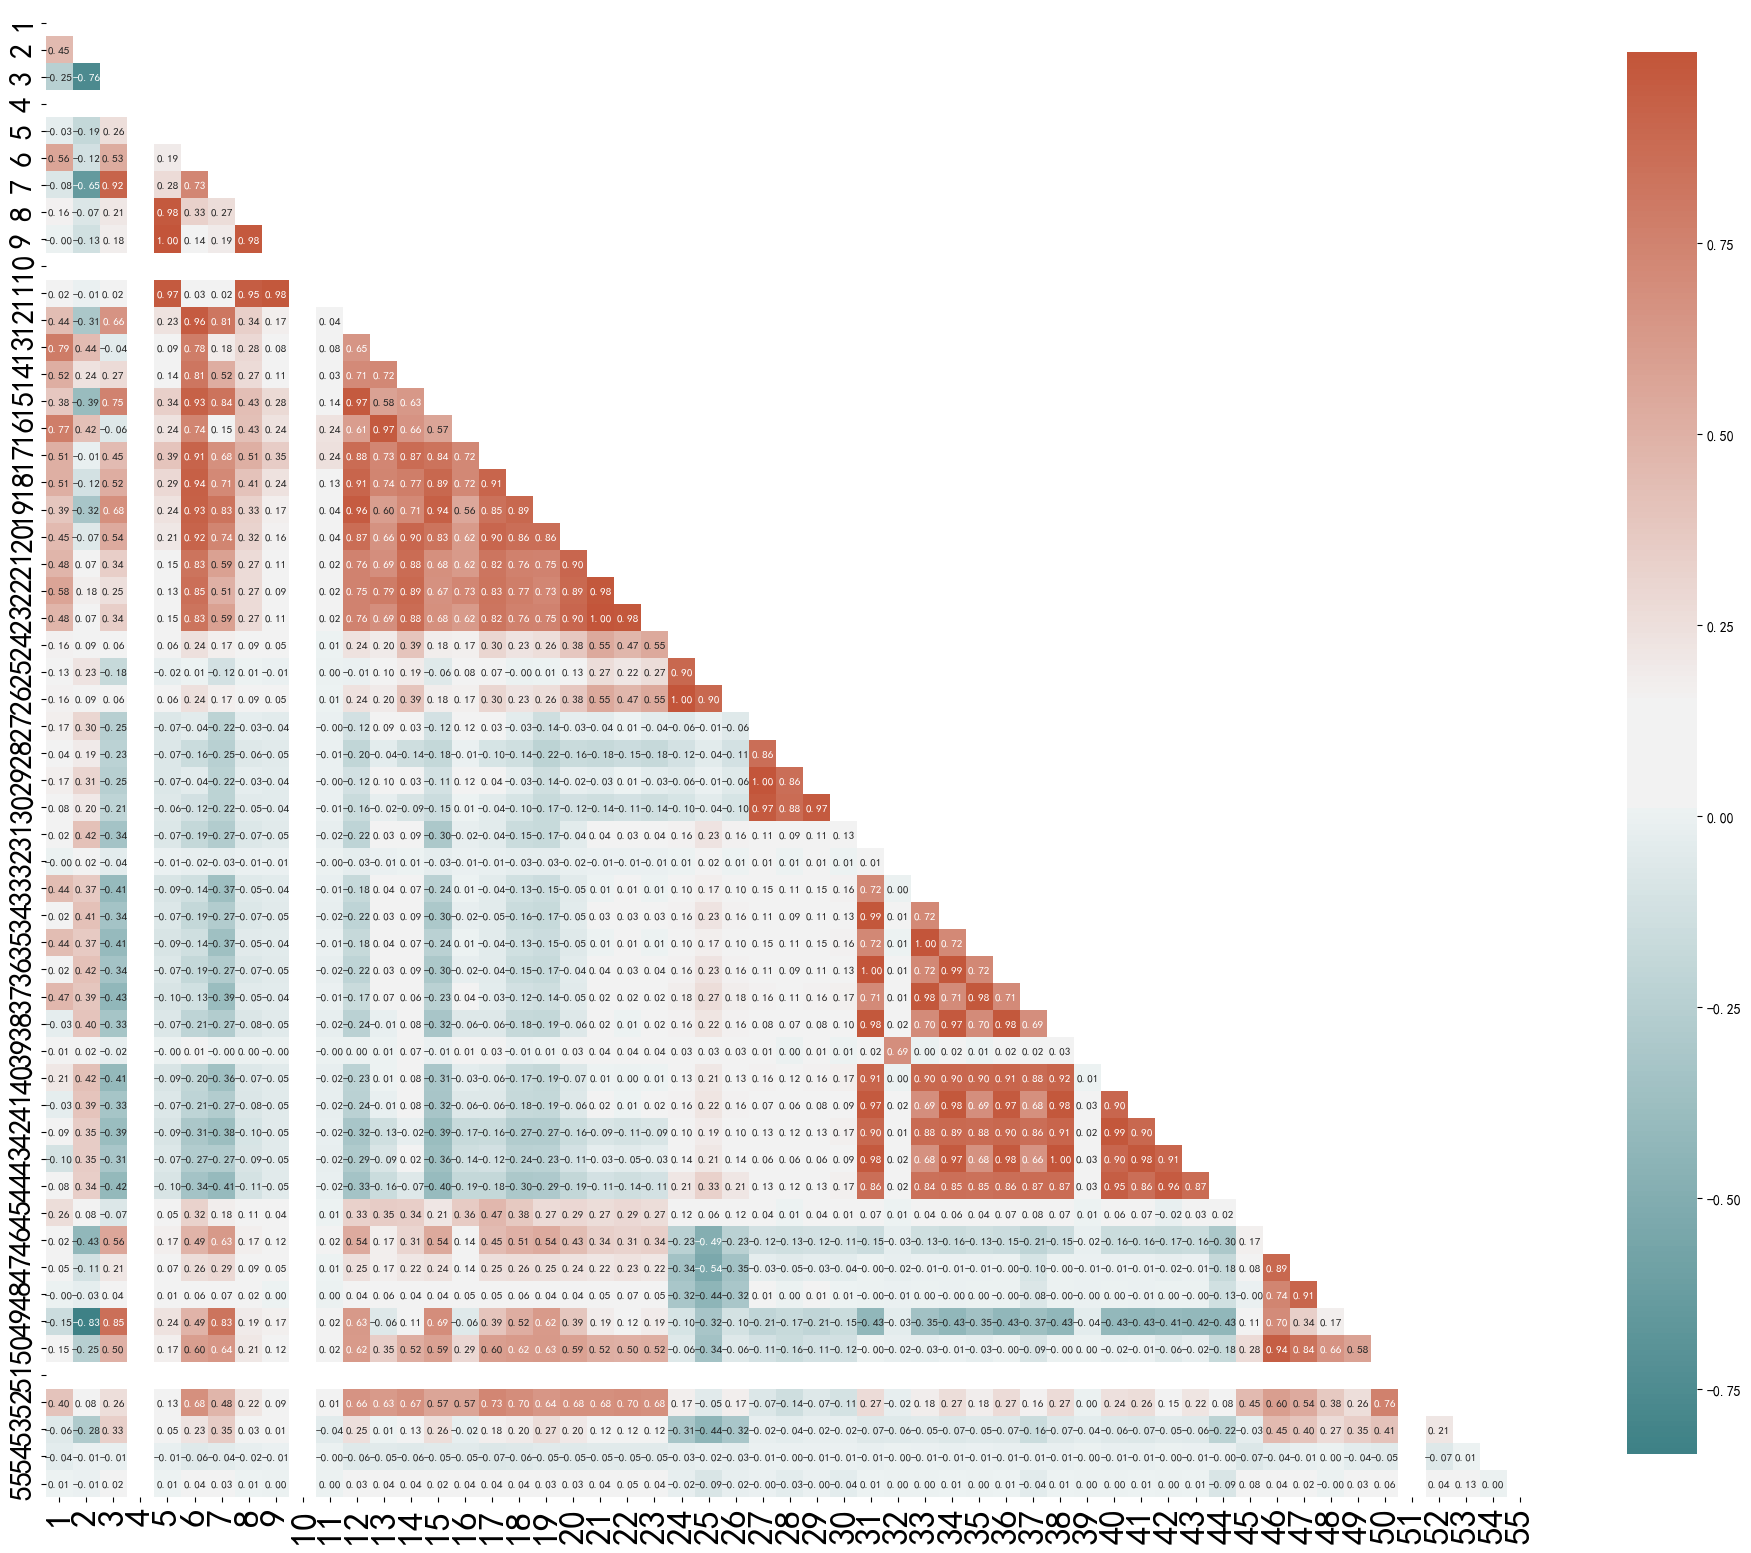

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True)
mask = np.triu(np.ones_like(data_tempt.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(24, 26))
sns.heatmap(data=data_tempt.corr(), cmap=cmap, mask=mask, square=True, annot=True, annot_kws={"size": 8}, fmt='.2f', cbar_kws={"shrink": 0.7})

plt.xticks(fontsize=26, rotation=90, ha='center')
plt.yticks(fontsize=22, va='center')

plt.savefig('all_hotplot.jpg', dpi=600, bbox_inches='tight', pad_inches=0)
plt.savefig('all_hotplot.svg', dpi=600, bbox_inches='tight', pad_inches=0)

plt.show()

In [27]:
print(data['callbacks.ngeneric'].value_counts())
print(data['svcscan.interactive_process_services'].value_counts())
print(data['handles.nport'].value_counts())
print(data['pslist.nprocs64bit'].value_counts())

callbacks.ngeneric
8    38751
7        6
Name: count, dtype: int64
svcscan.interactive_process_services
0    38757
Name: count, dtype: int64
handles.nport
0    38757
Name: count, dtype: int64
pslist.nprocs64bit
0    38757
Name: count, dtype: int64


In [28]:
bad=['svcscan.interactive_process_services','handles.nport','pslist.nprocs64bit',
     # 'malfind.protection','psxview.not_in_session','psxview.not_in_csrss_handles', 'psxview.not_in_session_false_avg',
    ]#'callbacks.ngeneric'
data=data.drop(bad,axis=1, inplace=False)

In [29]:
feature_cols = [col for col in data.columns if col not in ['Category', 'Class',]]

In [30]:
def missing(data):
    missing_number=data.isnull().sum().sort_values(ascending=False)
    missing_percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values=pd.concat([missing_number,missing_percent],axis=1,keys=['Missing_number','Missing_percent'])
    return missing_values
print(missing(data))

                                        Missing_number  Missing_percent
Category                                             0         0.000000
psxview.not_in_csrss_handles_false_avg               0         0.000000
psxview.not_in_pslist                                0         0.000000
psxview.not_in_eprocess_pool                         0         0.000000
psxview.not_in_ethread_pool                          0         0.000000
psxview.not_in_pspcid_list                           0         0.000000
psxview.not_in_csrss_handles                         0         0.000000
psxview.not_in_session                               0         0.000000
psxview.not_in_deskthrd                              0         0.000000
psxview.not_in_pslist_false_avg                      0         0.000000
psxview.not_in_eprocess_pool_false_avg               0         0.000000
psxview.not_in_ethread_pool_false_avg                0         0.000000
psxview.not_in_pspcid_list_false_avg                 0         0

In [31]:
data.to_csv('F:/DATA/勒索软件/CIC-MalMem-2022/archive/Ransomware_dataset_no_preprocessing.csv', index=0)